In [1]:
import numpy as np
from matplotlib import pyplot as plt

from utils import *
from model import MarkovModel
from instance_analysis import InstanceAnalysis
from concentration_gradient import ConcentrationGradient
from cg_pathway import CoarseGrainedPathway #not used in this demo

### Build the Markov model

In [2]:
model = MarkovModel(confs = "ohc",
                    v_index = 2,
                    activeConf = [2],
                    angle_cat = 80, jointConfTrans = False)
model.construct()
model.findRotModes()

### Create instance by a certain parameter set read from file

In [3]:
for k in [2]:
    
    vec_para, full_rec = readPara("demo.init.csv", k)
    print(k, vec_para)

    work_dir = prepareWorkDir("./file=%s,set=%d", True, "demo", k)
    instance = InstanceAnalysis(model, vec_para, work_dir)

    # Calculate physical quantities in different conditions (ATP/ADP concentrations)
    instance.scan_conc_gradient(gradient = "T",
                                concRange = {"T": np.logspace(-9, 0, 19),
                                             "D": [1e-9]})

2 [-2.23460e+00  3.68400e-01  0.00000e+00  9.38700e-01  1.99640e+00
  5.23160e+00  4.82290e+00  2.46950e+00  5.08810e+00  6.10000e-01
  1.38000e+01  1.38000e+01 -8.69990e+00 -4.42420e+00 -9.77490e+00
 -1.73199e+01 -3.76427e+01 -2.53116e+01 -2.68000e-04  2.00000e+00
  6.67000e-01  1.63000e+01  5.45000e+00]
Steady state ([ATP] = 1.00e-09, [ADP] = 1.00e-09)
k_cat = 0.01, k_rot = 0.00
Steady state ([ATP] = 3.16e-09, [ADP] = 1.00e-09)
k_cat = 0.02, k_rot = 0.00
Steady state ([ATP] = 1.00e-08, [ADP] = 1.00e-09)
k_cat = 0.05, k_rot = 0.01
Steady state ([ATP] = 3.16e-08, [ADP] = 1.00e-09)
k_cat = 0.15, k_rot = 0.05
Steady state ([ATP] = 1.00e-07, [ADP] = 1.00e-09)
k_cat = 0.46, k_rot = 0.15
Steady state ([ATP] = 3.16e-07, [ADP] = 1.00e-09)
k_cat = 1.41, k_rot = 0.46
Steady state ([ATP] = 1.00e-06, [ADP] = 1.00e-09)
k_cat = 4.26, k_rot = 1.41
Steady state ([ATP] = 3.16e-06, [ADP] = 1.00e-09)
k_cat = 12.07, k_rot = 4.01
Steady state ([ATP] = 1.00e-05, [ADP] = 1.00e-09)
k_cat = 28.78, k_rot = 9.5

### Data visualization

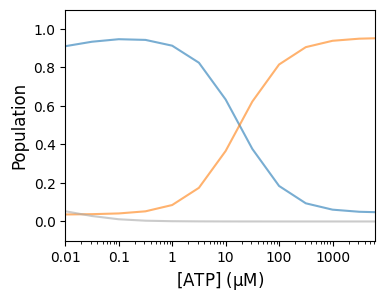

In [6]:
fig, ax = plt.subplots(1, 1, figsize = (4, 3))

for k in [2]:
    work_dir = "./file=demo,set=%d_1"%k
    ConcentrationGradient().plotRotModesPopulation(\
        ax, "%s/SteadyStates_cD=1.00e-09.csv"%work_dir,
        which = "T")

ax.set_xticklabels([0.01, 0.1, 1, 10, 100, 1000])
ax.set_xlabel("[ATP] ($\\mathrm{\\mu}$M)")
ax.set_xticklabels([0.01, 0.1, 1, 10, 100, 1000])
ax.set_xlabel("[ATP] ($\\mathrm{\\mu}$M)")

plt.savefig("population_shift.png",  dpi = 500, bbox_inches = "tight", transparent = True)
plt.show()